First, prepare ambiguous embeddings for processing. For use in this process, each vector value must be between 0 and 1.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Data/Embeddings/cilp_hba_embedding_ambiguousPairs.csv')

# Remove the first column
data = data.iloc[:, 1:]

# Save the modified dataset to a new file
data.to_csv('/home/wallacelab/complexity-experiment/Final Paper Data/headingless_cilp_hba_embedding_ambiguousPairs.csv', index=False)


In [3]:
# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/headingless_cilp_hba_embedding_ambiguousPairs.csv')

# Divide all numerical columns by 100
data_numeric = data.select_dtypes(include=['number'])
data[data_numeric.columns] = data_numeric / 100

# Save the modified dataset to a new file
data.to_csv('/home/wallacelab/complexity-experiment/Final Paper Data/headingless_cilp_hba_embedding_ambiguousPairs.csv', index=False)


Then, calculate change in entropy using the weights from the last experiment.

In [5]:
import numpy as np
import pandas as pd

# Load your data
weights_df = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/just_weights.csv')  # Update path as needed
matrix_df = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/headingless_cilp_hba_embedding_ambiguousPairs.csv')  # Update path as needed

# Assuming the weights are in a column named 'Weight'
weights = weights_df['Weight'].values

# Convert the entire matrix dataframe to a numpy array
matrix = matrix_df.values

# Compute the dot products
dot_products = np.dot(matrix, weights)

# Convert the results into a DataFrame
results_df = pd.DataFrame(dot_products, columns=['Dot Product'])

# Save the results to a new CSV file
results_df.to_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_entropy_changes.csv', index=False)

Now apply the changes to the previously calculated ambiguous entropy scores.

In [8]:
# Load the datasets
data1 = pd.read_csv('/home/wallacelab/complexity-experiment/Data/EntropyScores/ambiguous_scaled_embedding_entropy_scores.csv')
data2 = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_entropy_changes.csv')

# Selecting the column to append
column_to_append = data2['Entropy Change']

# Append the column to the first dataset
data1['Entropy Change'] = column_to_append

# Save the modified dataset to a new file
data1.to_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv', index=False)

In [9]:
# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# 
data['Weighted Entropy'] = data.iloc[:, 1] + data.iloc[:, 4]

# Save the modified dataset to a new file
data.to_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv', index=False)

Now calculate the expected proportion of participant response based on reweighted entropy scores.

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Initialize the new column with NaN (Not a Number) values
data['WE Proportion'] = float('nan')

# Calculate the relative proportion for every two rows
for i in range(0, len(data) - 1, 2):
    # Ensure not to exceed the index range
    if i + 1 < len(data):
        a = data.loc[i, 'Weighted Entropy']
        b = data.loc[i + 1, 'Weighted Entropy']
        total = a + b
        if total > 0:
            data.loc[i, 'WE Proportion'] = a / total
            data.loc[i + 1, 'WE Proportion'] = b / total

# Save the modified dataset to a new file
data.to_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv', index=False)

Now perform a Spearman correlation between the expected proportions based on reweighting and and actual proportions.

In [17]:
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Ensure there are no missing values in the columns of interest
data.dropna(subset=['Proportion', 'WE Proportion'], inplace=True)

# Calculate the Spearman correlation coefficient and p-value
rho, p_value = spearmanr(data['Proportion'], data['WE Proportion'])

# Print the Spearman correlation coefficient and p-value
print(f"Spearman correlation coefficient (rho): {rho}")
print(f"P-value: {p_value}")


Spearman correlation coefficient (rho): 0.8539455913563575
P-value: 1.5332229062404661e-21


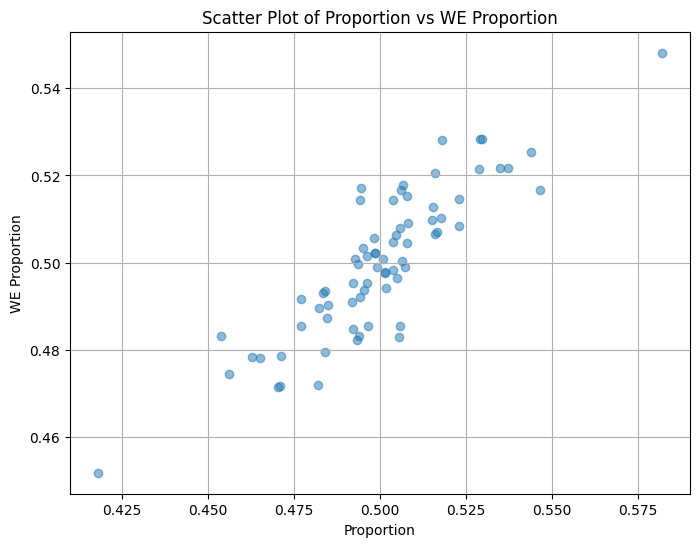

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Ensure there are no missing values in the columns of interest
data.dropna(subset=['Proportion', 'WE Proportion'], inplace=True)

# Create a scatterplot of 'Proportion' vs 'WE Proportion'
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(data['Proportion'], data['WE Proportion'], alpha=0.5)  # Plot the data
plt.title('Scatter Plot of Proportion vs WE Proportion')  # Add a title
plt.xlabel('Proportion')  # Label the x-axis
plt.ylabel('WE Proportion')  # Label the y-axis
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

Now correlate ambiguous and control proportions separately.

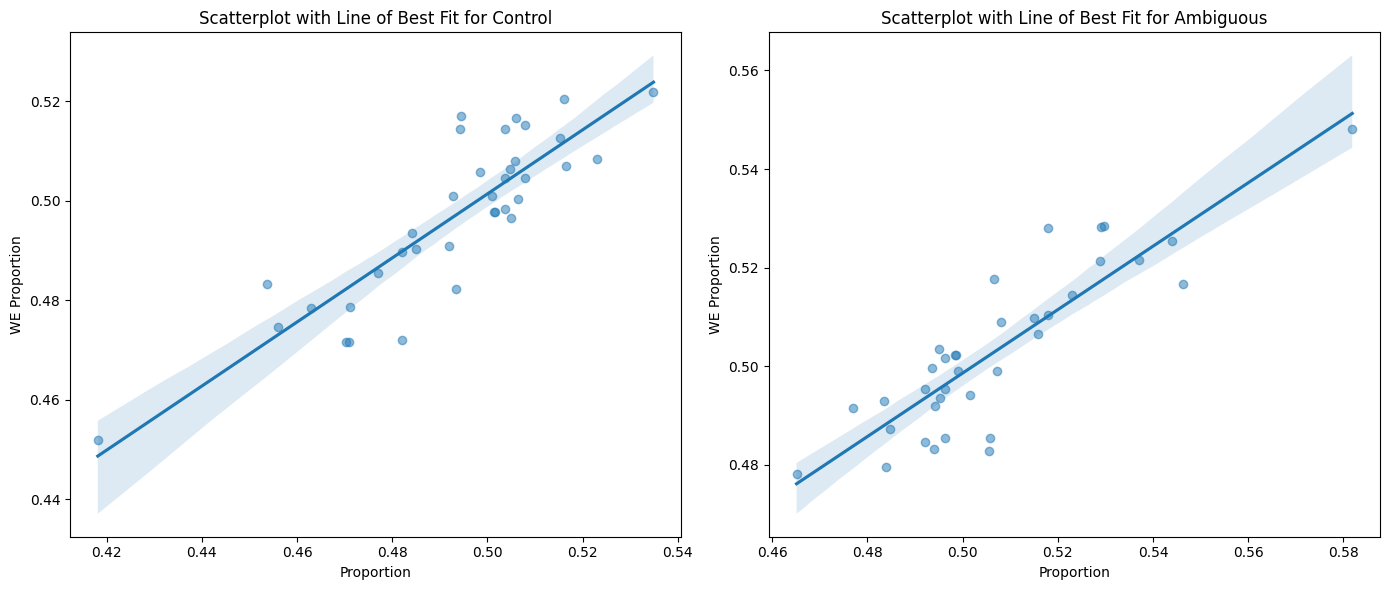

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Filter subsets based on 'Image Name' conditions
condition_c = data['Image Name'].str.endswith(('_c.jpg', '_c.png'))
condition_no_c = data['Image Name'].str.endswith(('.jpg', '.png')) & ~data['Image Name'].str.contains('_c.')

# Dataset for filenames ending with '_c.jpg' or '_c.png'
data_c = data[condition_c].dropna(subset=['Proportion', 'WE Proportion'])

# Dataset for filenames ending with '.jpg' or '.png' (excluding those with '_c.')
data_no_c = data[condition_no_c].dropna(subset=['Proportion', 'WE Proportion'])

# Function to plot scatterplot with regression line
def plot_scatter(data, title, ax):
    if not data.empty:
        sns.regplot(x='Proportion', y='WE Proportion', data=data, ax=ax, scatter_kws={'alpha': 0.5})
        ax.set_title(title)
        ax.set_xlabel('Proportion')
        ax.set_ylabel('WE Proportion')
    else:
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(title)
        ax.set_xlabel('Proportion')
        ax.set_ylabel('WE Proportion')

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting
plot_scatter(data_c, "Scatterplot with Line of Best Fit for Control", axes[0])
plot_scatter(data_no_c, "Scatterplot with Line of Best Fit for Ambiguous", axes[1])

plt.tight_layout()
plt.show()


Now correlate again with proportion differences instead to confirm.

Spearman correlation coefficient (rho): 0.835014005602241, P-value: 4.470816725385168e-10


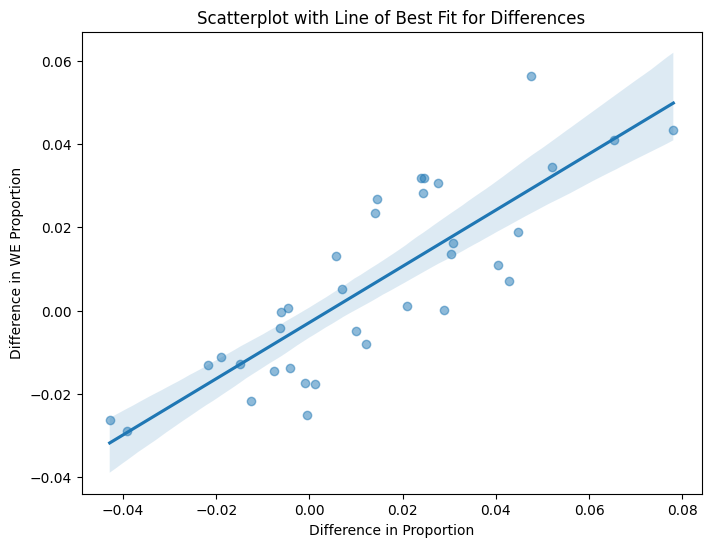

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Calculate differences between every two rows for both columns
data['Proportion_diff'] = data['Proportion'].diff()
data['WE_Proportion_diff'] = data['WE Proportion'].diff()

# Remove NaN values that result from diff operation
data_diff = data.dropna(subset=['Proportion_diff', 'WE_Proportion_diff'])

# Subset to get differences for even index pairs (1&2, 3&4, etc.)
data_diff_pairs = data_diff.iloc[1::2, :]

# Calculate the Spearman correlation for the differences
rho, p_value = spearmanr(data_diff_pairs['Proportion_diff'], data_diff_pairs['WE_Proportion_diff'])
print(f"Spearman correlation coefficient (rho): {rho}, P-value: {p_value}")

# Plotting the scatterplot with a line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='Proportion_diff', y='WE_Proportion_diff', data=data_diff_pairs, scatter_kws={'alpha': 0.5})
plt.title('Scatterplot with Line of Best Fit for Differences')
plt.xlabel('Difference in Proportion')
plt.ylabel('Difference in WE Proportion')
plt.show()

Spearman correlation coefficient (rho): 0.835014005602241, P-value: 4.470816725385168e-10


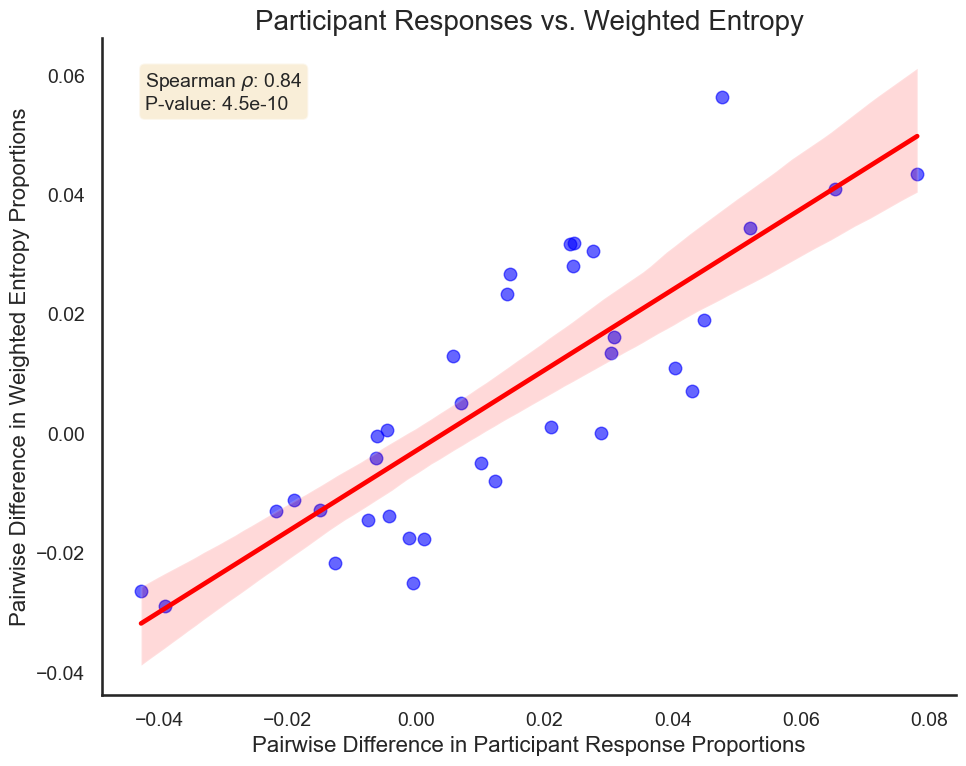

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Calculate differences between every two rows for both columns
data['Proportion_diff'] = data['Proportion'].diff()
data['WE_Proportion_diff'] = data['WE Proportion'].diff()

# Remove NaN values that result from diff operation
data_diff = data.dropna(subset=['Proportion_diff', 'WE_Proportion_diff'])

# Subset to get differences for even index pairs (1&2, 3&4, etc.)
data_diff_pairs = data_diff.iloc[1::2, :]

# Calculate the Spearman correlation for the differences
rho, p_value = spearmanr(data_diff_pairs['Proportion_diff'], data_diff_pairs['WE_Proportion_diff'])
print(f"Spearman correlation coefficient (rho): {rho}, P-value: {p_value}")

# Set the style of the visualization
sns.set(style='white', context='talk', palette='dark')

# Create the scatterplot with a line of best fit
plt.figure(figsize=(10, 8))
ax = sns.regplot(x='Proportion_diff', y='WE_Proportion_diff', data=data_diff_pairs,
                 scatter_kws={'alpha': 0.6, 'color': 'blue'}, line_kws={'color': 'red'})

# Enhancing plot aesthetics
ax.set_title('Participant Responses vs. Weighted Entropy', fontsize=20)
ax.set_xlabel('Pairwise Difference in Participant Response Proportions', fontsize=16)
ax.set_ylabel('Pairwise Difference in Weighted Entropy Proportions', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding text for Spearman correlation result in the plot
textstr = f'Spearman $\\rho$: {rho:.2f}\nP-value: {p_value:.2g}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()


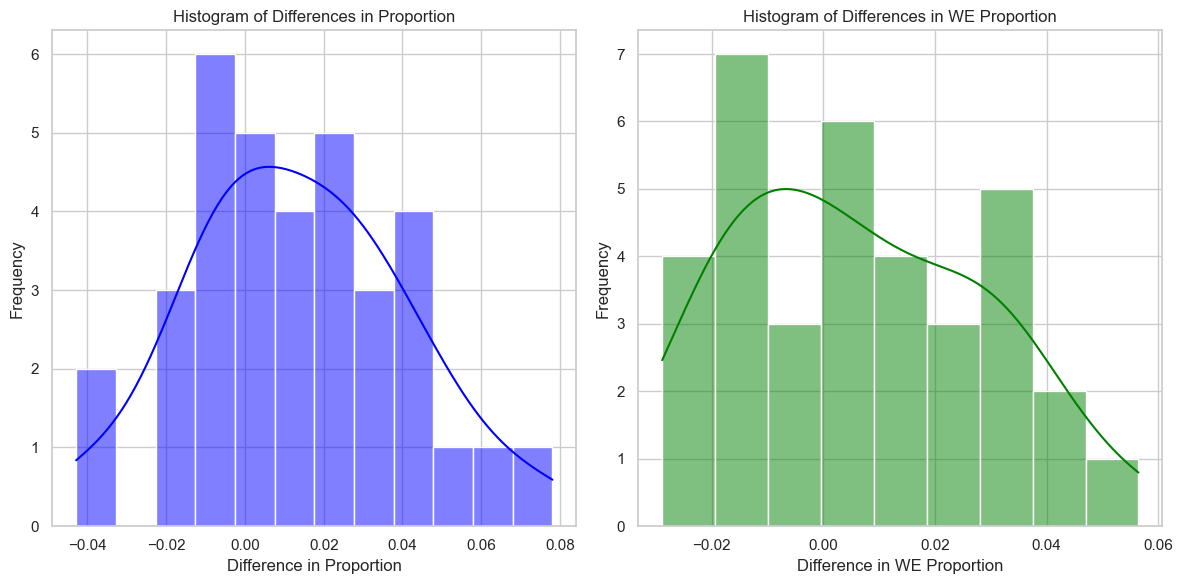

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a subplot for the first histogram
plt.subplot(1, 2, 1)  
sns.histplot(data=data_diff_pairs['Proportion_diff'], kde=True, color="blue", binwidth=0.01)
plt.title('Histogram of Differences in Proportion')
plt.xlabel('Difference in Proportion')
plt.ylabel('Frequency')

# Create a subplot for the second histogram
plt.subplot(1, 2, 2)  
sns.histplot(data=data_diff_pairs['WE_Proportion_diff'], kde=True, color="green", binwidth=0.01)
plt.title('Histogram of Differences in WE Proportion')
plt.xlabel('Difference in WE Proportion')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


Spearman correlation coefficient (rho): 0.3557422969187675, P-value: 0.03596483616245869


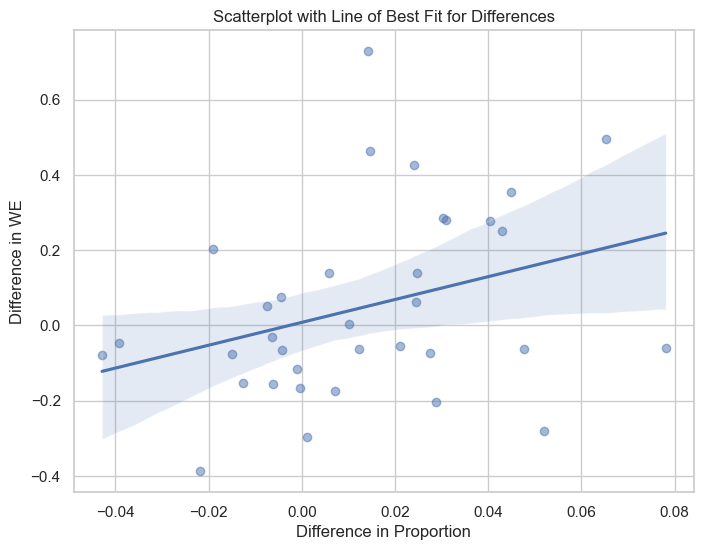

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Calculate differences between every two rows for both columns
data['Proportion_diff'] = data['Proportion'].diff()
data['WE_diff'] = data['Weighted Entropy'].diff()

# Remove NaN values that result from diff operation
data_diff = data.dropna(subset=['Proportion_diff', 'WE_diff'])

# Subset to get differences for even index pairs (1&2, 3&4, etc.)
data_diff_pairs = data_diff.iloc[1::2, :]

# Calculate the Spearman correlation for the differences
rho, p_value = spearmanr(data_diff_pairs['Proportion_diff'], data_diff_pairs['WE_diff'])
print(f"Spearman correlation coefficient (rho): {rho}, P-value: {p_value}")

# Plotting the scatterplot with a line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='Proportion_diff', y='WE_diff', data=data_diff_pairs, scatter_kws={'alpha': 0.5})
plt.title('Scatterplot with Line of Best Fit for Differences')
plt.xlabel('Difference in Proportion')
plt.ylabel('Difference in WE')
plt.show()

Spearman correlation coefficient (rho): -0.4882882882882883, P-value: 0.0025167118219032412


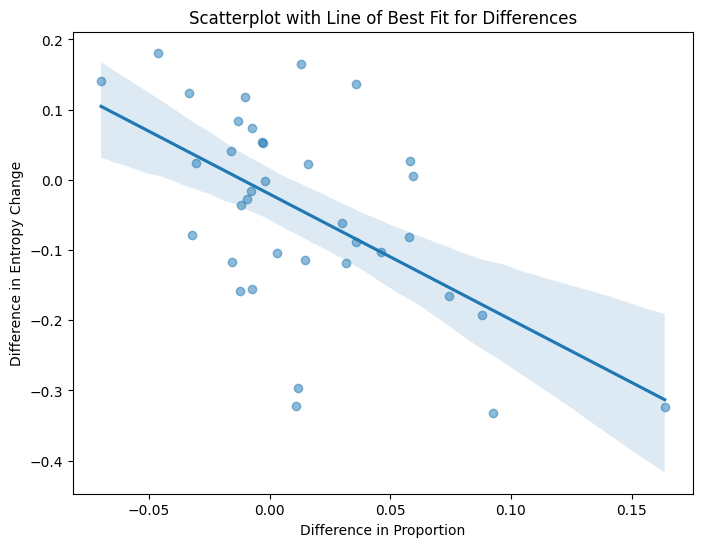

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load the dataset
data = pd.read_csv('/home/wallacelab/complexity-experiment/Final Paper Data/ambiguous_weighted_entropy_scores.csv')

# Check if data has an even number of rows; if not, drop the last row to make it even
if len(data) % 2 != 0:
    data = data[:-1]

# Calculate differences between every two rows for both columns
differences = pd.DataFrame({
    'Proportion_diff': data['Proportion'].iloc[::2].values - data['Proportion'].iloc[1::2].values,
    'Entropy_Change_diff': data['Entropy Change'].iloc[::2].values - data['Entropy Change'].iloc[1::2].values
})

# Calculate the Spearman correlation for these differences
rho, p_value = spearmanr(differences['Proportion_diff'], differences['Entropy_Change_diff'])
print(f"Spearman correlation coefficient (rho): {rho}, P-value: {p_value}")

# Plotting the scatterplot with a line of best fit
plt.figure(figsize=(8, 6))
sns.regplot(x='Proportion_diff', y='Entropy_Change_diff', data=differences, scatter_kws={'alpha': 0.5})
plt.title('Scatterplot with Line of Best Fit for Differences')
plt.xlabel('Difference in Proportion')
plt.ylabel('Difference in Entropy Change')
plt.show()
